In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from src.visualization.plots import *

In [3]:
def summary_relative_error(path='../results/instance_selection'):
    exps = sorted([exp[:-5] for exp in os.listdir(path)])
    exp_by_df = 9 * 3 * 5
    summary = pd.DataFrame(columns = ['performance gap', 'sampling method','dataset','sample', 'model'], index = range(len(exps) * exp_by_df))
    smpl = [round(i*0.1, 1) for i in range(1, 10)]
    i = 9
    for exp in exps:
        with open(f'{path}/{exp}.json', 'r') as fin:
            exp_summary = json.load(fin)
        dataset = [exp for i in range(9)]
        for sampling_method in ['test_score_kdn', 'test_score_dynamic_kdn', 'test_score_dynamic_kdn_full', 'test_score_dynamic_kdn_grouped', 'test_score_dynamic_kdn_full_grouped']:
            
            for model in ['SVC', 'KNeighborsClassifier', 'RandomForestClassifier']:
                test_score = exp_summary[model]['test_score']
                relative_error = [test_score-i for i in exp_summary[model][sampling_method]]
                
                summary.loc[(i-9):(i-1), 'sampling method'] = sampling_method
                summary.loc[(i-9):(i-1), 'model'] = model
                summary.loc[(i-9):(i-1), 'sample'] = smpl
                summary.loc[(i-9):(i-1), 'dataset'] = dataset
                summary.loc[(i-9):(i-1), 'performance gap'] = relative_error
                i += 9
    return summary


def score_by_sampling(df, sampling_method):
    mean_mcc = df[(df['sampling method'] == sampling_method)].groupby(['model','sample'])['performance gap'].mean()
    test_score_method = pd.DataFrame(columns = ['SVC', 'KNeighborsClassifier', 'RandomForestClassifier'], index = [round(i*0.1, 1) for i in range(1, 10)],
             data = np.hstack((mean_mcc.SVC.values.reshape(-1, 1), mean_mcc.KNeighborsClassifier.values.reshape(-1, 1), mean_mcc.RandomForestClassifier.values.reshape(-1, 1))))
    test_score_sample = pd.DataFrame(columns = [round(i*0.1, 1) for i in range(1, 10)], index = ['SVC', 'KNeighborsClassifier', 'RandomForestClassifier'], 
                          data = np.hstack(([mean_mcc.loc[:,round(i*0.1, 1)].values.reshape(-1, 1) for i in range(1, 10)])))
    return test_score_method, test_score_sample

In [4]:
df = summary_relative_error()

In [5]:
test_score_method, test_score_sample = score_by_sampling(df, 'test_score_kdn')

In [6]:
test_score_method.describe()

,SVC,KNeighborsClassifier,RandomForestClassifier
count,9.000000,9.000000,9.000000
mean,0.012338,0.014014,0.021353
std,0.017907,0.022026,0.023284
min,-0.001173,-0.004833,0.000157
25%,-0.000038,-0.001163,0.006378
50%,0.002497,0.003471,0.010241
75%,0.017508,0.016040,0.027713
max,0.048860,0.058052,0.061688


In [7]:
test_score_sample.describe()

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,0.056200,0.044792,0.020420,0.012780,0.003173,0.004558,0.000671,-0.001080,0.001603
std,0.006611,0.012106,0.006358,0.004573,0.004340,0.005225,0.002409,0.003313,0.005279
min,0.048860,0.034172,0.016040,0.008005,-0.001173,-0.000038,-0.001163,-0.004833,-0.004065
25%,0.053456,0.038201,0.016774,0.010610,0.001005,0.001716,-0.000693,-0.002338,-0.000784
50%,0.058052,0.042230,0.017508,0.013216,0.003183,0.003471,-0.000223,0.000157,0.002497
75%,0.059870,0.050102,0.022611,0.015168,0.005345,0.006856,0.001588,0.000797,0.004438
max,0.061688,0.057973,0.027713,0.017120,0.007508,0.010241,0.003399,0.001437,0.006378


In [8]:
test_score_method, test_score_sample = score_by_sampling(df, 'test_score_dynamic_kdn')

In [9]:
test_score_method.describe()

,SVC,KNeighborsClassifier,RandomForestClassifier
count,9.000000,9.000000,9.000000
mean,0.021690,0.026369,0.026769
std,0.028429,0.032754,0.034811
min,0.001295,0.002359,-0.002235
25%,0.003355,0.006502,0.002782
50%,0.008187,0.012601,0.007957
75%,0.030266,0.030611,0.033383
max,0.085906,0.103523,0.089137


In [10]:
test_score_sample.describe()

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,0.092855,0.058810,0.031420,0.016542,0.009492,0.004719,0.000482,0.004471,0.005692
std,0.009379,0.019011,0.001709,0.004746,0.008504,0.003318,0.002409,0.001884,0.003809
min,0.085906,0.045536,0.030266,0.012601,0.003355,0.001574,-0.002235,0.002782,0.001295
25%,0.087521,0.047921,0.030438,0.013908,0.004638,0.002986,-0.000457,0.003455,0.004560
50%,0.089137,0.050306,0.030611,0.015214,0.005922,0.004397,0.001321,0.004128,0.007825
75%,0.096330,0.065447,0.031997,0.018513,0.012560,0.006292,0.001840,0.005315,0.007891
max,0.103523,0.080589,0.033383,0.021811,0.019199,0.008187,0.002359,0.006502,0.007957


In [11]:
test_score_method, test_score_sample = score_by_sampling(df, 'test_score_dynamic_kdn_full')

In [12]:
test_score_method.describe()

,SVC,KNeighborsClassifier,RandomForestClassifier
count,9.000000,9.000000,9.000000
mean,0.030371,0.040603,0.036869
std,0.037655,0.044628,0.040780
min,0.002090,0.005323,0.004288
25%,0.008287,0.018111,0.005096
50%,0.015478,0.027553,0.014748
75%,0.027054,0.032613,0.058156
max,0.117176,0.142675,0.118659


In [13]:
test_score_sample.describe()

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,0.126170,0.076922,0.039274,0.024409,0.021105,0.014997,0.009770,0.006984,0.003901
std,0.014313,0.009800,0.016587,0.007847,0.008126,0.003085,0.007241,0.001744,0.001651
min,0.117176,0.065644,0.027054,0.015478,0.013922,0.012043,0.005096,0.005003,0.002090
25%,0.117917,0.073698,0.029833,0.021516,0.016695,0.013396,0.005599,0.006332,0.003189
50%,0.118659,0.081753,0.032613,0.027553,0.019469,0.014748,0.006102,0.007662,0.004288
75%,0.130667,0.082560,0.045385,0.028875,0.024697,0.016473,0.012106,0.007974,0.004806
max,0.142675,0.083368,0.058156,0.030197,0.029925,0.018199,0.018111,0.008287,0.005323


In [14]:
test_score_method, test_score_sample = score_by_sampling(df, 'test_score_dynamic_kdn_grouped')

In [15]:
test_score_method.describe()

,SVC,KNeighborsClassifier,RandomForestClassifier
count,9.000000,9.000000,9.000000
mean,0.036263,0.061376,0.045757
std,0.043860,0.044398,0.048012
min,0.002065,0.022802,0.005449
25%,0.006351,0.030827,0.006298
50%,0.018937,0.038196,0.024245
75%,0.041884,0.090039,0.072416
max,0.132347,0.148903,0.133798


In [16]:
test_score_sample.describe()

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,0.138350,0.098509,0.068113,0.042891,0.027126,0.017883,0.014184,0.012746,0.010388
std,0.009168,0.015725,0.024364,0.010202,0.009948,0.014768,0.014417,0.011866,0.010957
min,0.132347,0.080457,0.041884,0.031564,0.018937,0.006585,0.005548,0.005449,0.002065
25%,0.133073,0.093148,0.057150,0.038657,0.021591,0.009528,0.005862,0.005900,0.004181
50%,0.133798,0.105840,0.072416,0.045750,0.024245,0.012471,0.006176,0.006351,0.006298
75%,0.141351,0.107535,0.081228,0.048554,0.031220,0.023533,0.018501,0.016394,0.014550
max,0.148903,0.109230,0.090039,0.051357,0.038196,0.034594,0.030827,0.026438,0.022802


In [18]:
test_score_method, test_score_sample = score_by_sampling(df, 'test_score_dynamic_kdn_full_grouped')

In [19]:
test_score_method.describe()

,SVC,KNeighborsClassifier,RandomForestClassifier
count,9.000000,9.000000,9.000000
mean,0.042033,0.060426,0.046588
std,0.047910,0.062707,0.063220
min,0.002018,0.012031,-0.002442
25%,0.011315,0.020784,0.002401
50%,0.019745,0.035457,0.023512
75%,0.047865,0.062252,0.064959
max,0.146473,0.204423,0.184832


In [20]:
test_score_sample.describe()

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,0.178576,0.103675,0.058359,0.042355,0.021347,0.018380,0.012142,0.004893,0.007414
std,0.029477,0.011805,0.009188,0.008668,0.001946,0.016555,0.015015,0.008511,0.004018
min,0.146473,0.091091,0.047865,0.037016,0.019745,0.002401,-0.002442,-0.001807,0.004719
25%,0.165652,0.098260,0.055059,0.037354,0.020264,0.009842,0.004436,0.000105,0.005105
50%,0.184832,0.105429,0.062252,0.037692,0.020784,0.017282,0.011315,0.002018,0.005491
75%,0.194627,0.109967,0.063605,0.045024,0.022148,0.026370,0.019435,0.008244,0.008761
max,0.204423,0.114506,0.064959,0.052357,0.023512,0.035457,0.027554,0.014469,0.012031


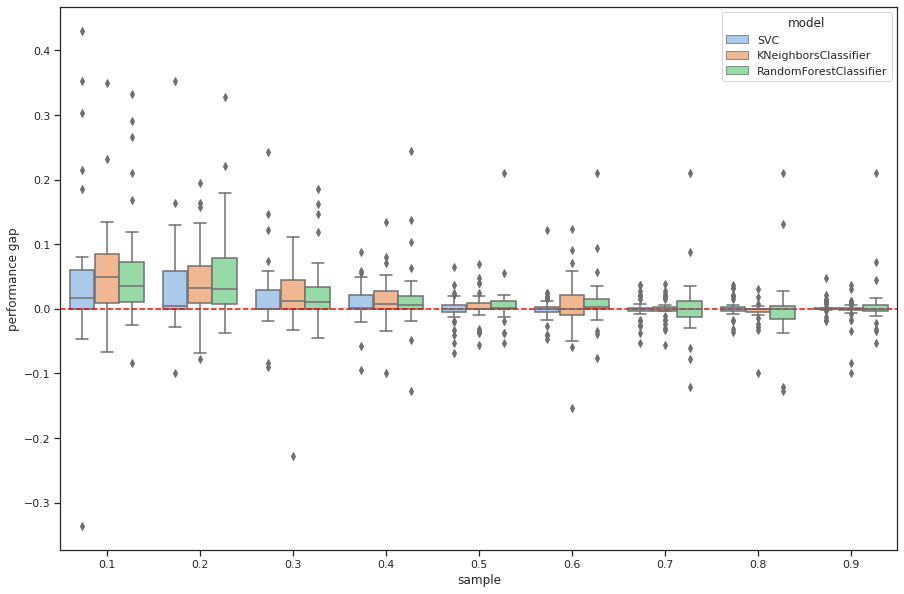

In [21]:
box_plot(df, 'test_score_kdn')

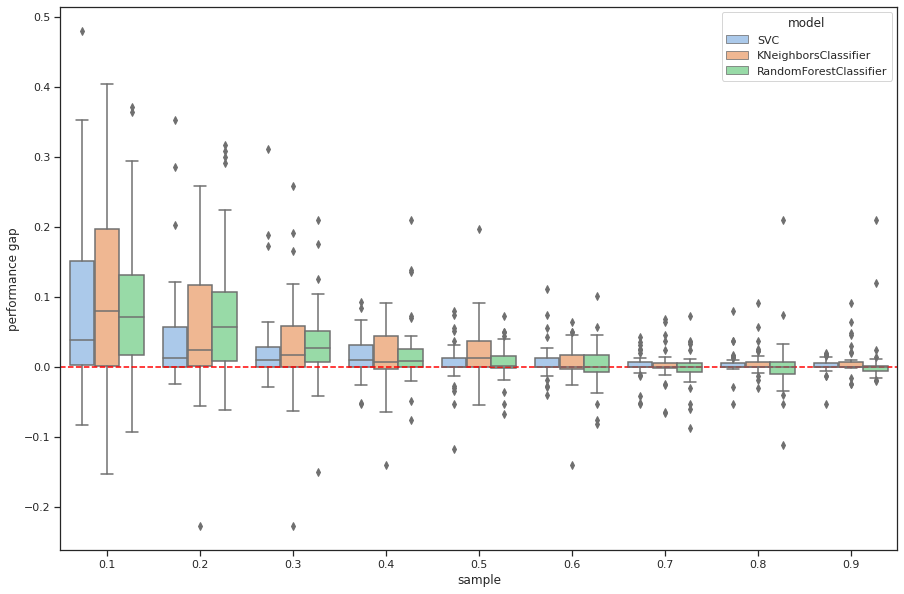

In [22]:
box_plot(df, 'test_score_dynamic_kdn')

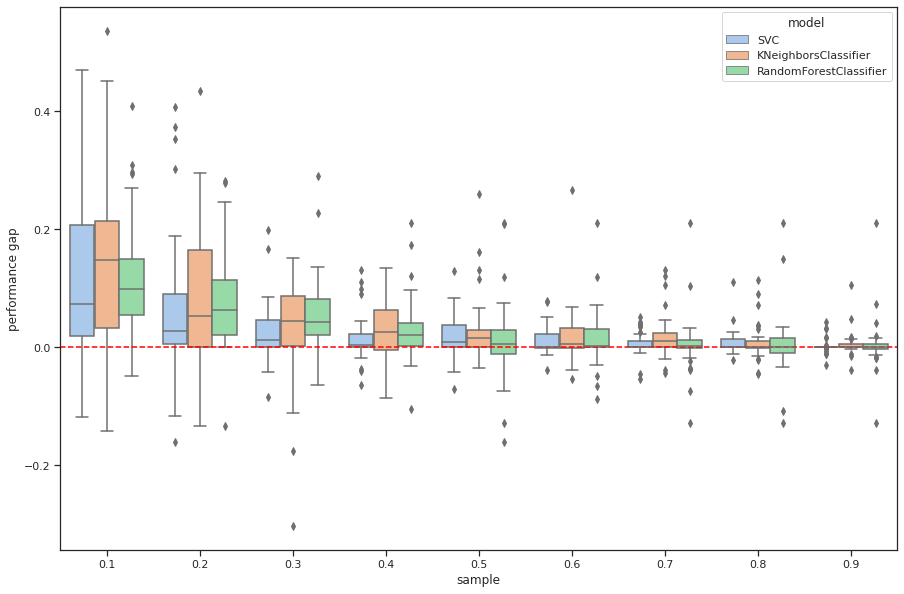

In [23]:
box_plot(df, 'test_score_dynamic_kdn_full')

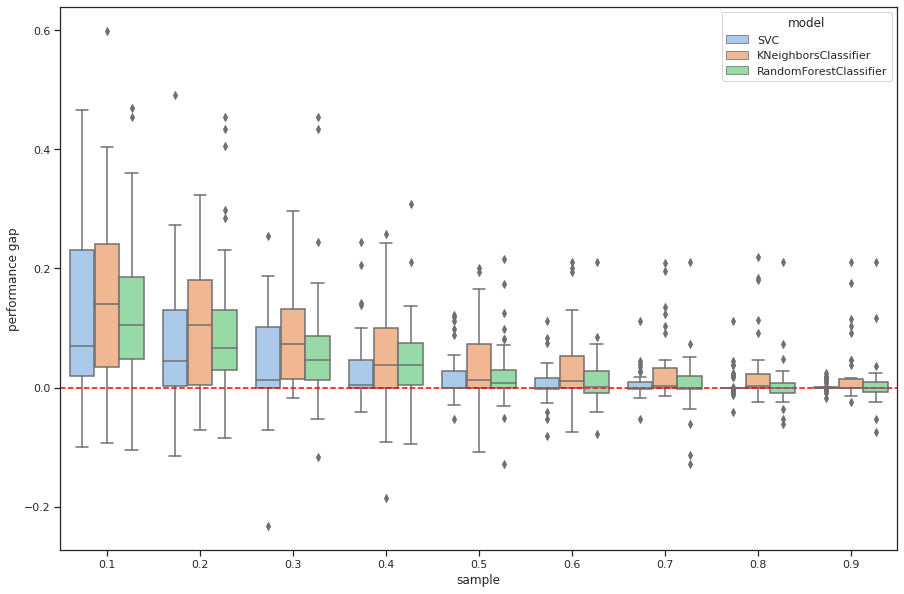

In [24]:
box_plot(df, 'test_score_dynamic_kdn_grouped')

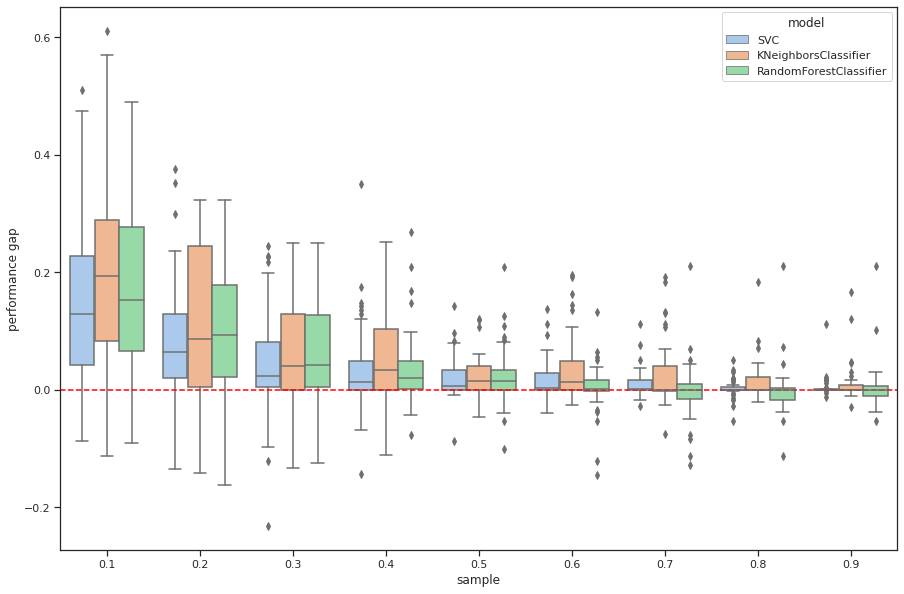

In [25]:
box_plot(df, 'test_score_dynamic_kdn_full_grouped')